In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import zipfile


# Import Data

if not os.path.exists('pizza_steak.zip'):
  !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
  zipref = zipfile.ZipFile('pizza_steak.zip')
  zipref.extractall()
  zipref.close()
else:
  print('file alrady exists')


file alrady exists


In [106]:
invalid_pics = []
data_paths =[]
data_labels = np.array([])

food_labels = ['pizza','steak']

# Get training urls
for set_ in ['train','test']:
  for food_label in food_labels:
    directory = 'pizza_steak/'+set_+'/'+food_label
    img_list = os.listdir(directory)
    temp_list = [ os.path.join(directory,img) for img in img_list]
    for img_url in temp_list:
      flag = 1
      img = Image.open(img_url)
      img = img.resize((512,512))
      img = np.array(img)
      if len(img.shape) != 3:  # Check if img is colored => pass to the model
        flag = 0
        invalid_pics.append(img_url)
      if flag:
        data_paths.append(img_url)
        data_labels = np.append(data_labels,food_label)


# Removing all of invalid pics
[os.remove(invalid_pic) for invalid_pic in invalid_pics]

[]

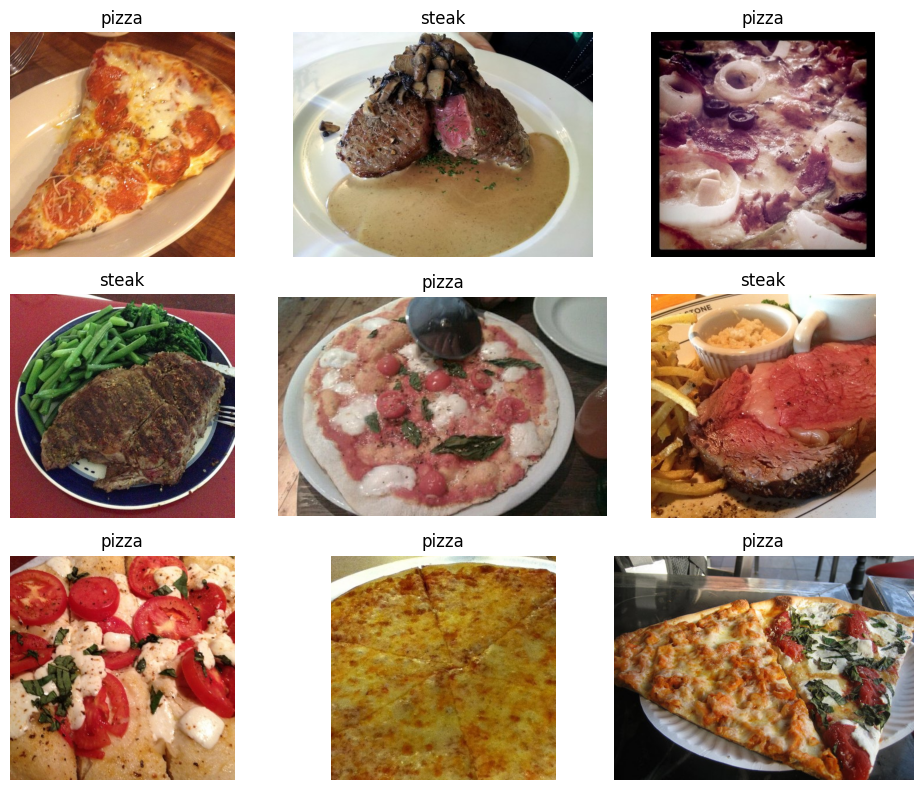

In [90]:
# Visualize random input data
import math
samples = 9
num_rows = math.ceil(samples/3)

fig, axes = plt.subplots(num_rows, 3, figsize=(10,8))

for i, img_no in enumerate(np.random.randint(0,data_labels.shape[0]-1,size=(samples))):
    row,col = divmod(i, 3)
    img = Image.open(data_paths[img_no])
    axes[row,col].imshow(img)
    axes[row,col].set_title(data_labels[img_no])
    axes[row,col].axis('off')

plt.tight_layout()
plt.show()

In [54]:
# Building CNN Neural Network


tf.random.set_seed(40)


train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


train_data = train_datagen.flow_from_directory('pizza_steak/train',
                                            target_size=(224,224),
                                            batch_size = 32,
                                            class_mode='binary',
                                            seed=40)

test_data = train_datagen.flow_from_directory('pizza_steak/test',
                                            target_size=(224,224),
                                            batch_size = 32,
                                            class_mode='binary',
                                            seed=40)


model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(20,3,1,input_shape=(224,224,3),activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(20,3,1,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(20,3,1,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(20,3,1,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer= tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1 = model_1.fit(train_data,validation_data=test_data,epochs=15)

Found 1499 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


47/47 [==============================] - 10s 143ms/step - loss: 0.6756 - accuracy: 0.5797 - val_loss: 0.5110 - val_accuracy: 0.8020
Epoch 2/15
47/47 [==============================] - 7s 149ms/step - loss: 0.5187 - accuracy: 0.7705 - val_loss: 0.4306 - val_accuracy: 0.8200
Epoch 3/15
47/47 [==============================] - 5s 114ms/step - loss: 0.4248 - accuracy: 0.8145 - val_loss: 0.3413 - val_accuracy: 0.8580
Epoch 4/15
47/47 [==============================] - 6s 137ms/step - loss: 0.3819 - accuracy: 0.8372 - val_loss: 0.3413 - val_accuracy: 0.8720
Epoch 5/15
47/47 [==============================] - 5s 110ms/step - loss: 0.3888 - accuracy: 0.8192 - val_loss: 0.3192 - val_accuracy: 0.8680
Epoch 6/15
47/47 [==============================] - 6s 135ms/step - loss: 0.3356 - accuracy: 0.8666 - val_loss: 0.3313 - val_accuracy: 0.8520
Epoch 7/15
47/47 [==============================] - 6s 117ms/step - loss: 0.3187 - accuracy: 0.8679 - val_loss: 0.3108 - val_accuracy: 0.8680
Epoch 8/15
47/47

#### How testing Acc is high:
After trainning the model on kernel size of 3 and strides of 1, the val_accuray where consistantly decreasing, thus we concluded that the model is overfitting the trainning data, and overfitting was solved by below:
- Making sure the model dont read the pixel multiple time by setting strides equal or greater to the kernel size !!
- Adding aditional Dense layer prior to the output layer

<Axes: >

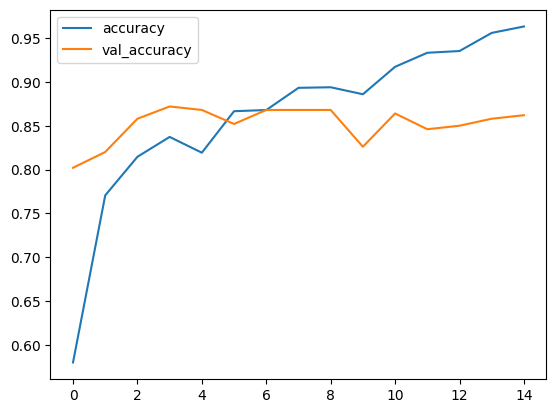

In [55]:
pd.DataFrame(history_1.history)[['accuracy','val_accuracy']].plot()

In [44]:
model_1.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_80 (Conv2D)          (None, 75, 75, 200)       2600      
                                                                 
 conv2d_81 (Conv2D)          (None, 25, 25, 200)       160200    
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 12, 12, 200)       0         
 ng2D)                                                           
                                                                 
 conv2d_82 (Conv2D)          (None, 6, 6, 200)         160200    
                                                                 
 conv2d_83 (Conv2D)          (None, 3, 3, 200)         160200    
                                                                 
 max_pooling2d_41 (MaxPooli  (None, 1, 1, 200)         0         
 ng2D)                                               

### Rerun same model with data augumentation

In [80]:
train_datagen_augumented = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                rotation_range=0.2,
                                                                shear_range=0.2,
                                                                zoom_range=0.2,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                horizontal_flip = True)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


train_data = train_datagen.flow_from_directory('pizza_steak/train',
                                            target_size=(224,224),
                                            batch_size = 32,
                                            class_mode='binary',
                                            seed=40)

test_data = train_datagen.flow_from_directory('pizza_steak/test',
                                            target_size=(224,224),
                                            batch_size = 32,
                                            class_mode='binary',
                                            seed=40)

train_data_augumented = train_datagen_augumented.flow_from_directory('pizza_steak/train',
                                            target_size=(224,224),
                                            batch_size = 32,
                                            class_mode='binary',
                                            seed=40)

Found 1499 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 1499 images belonging to 2 classes.


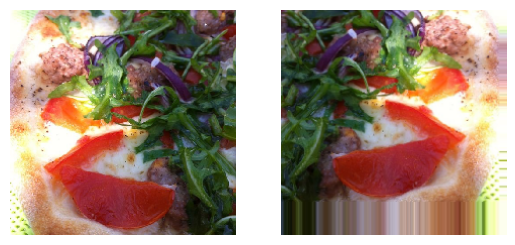

In [86]:
# Visualizing data augumentaition
batch = 0
img = 4

plt.subplot(1,2,2)
plt.imshow(train_data_augumented[batch][0][img])
plt.axis('off')
plt.subplot(1,2,1)
plt.imshow(train_data[batch][0][img])
plt.axis('off')
plt.show()


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


47/47 [==============================] - 35s 598ms/step - loss: 0.6695 - accuracy: 0.5704 - val_loss: 0.5253 - val_accuracy: 0.7520
Epoch 2/15
47/47 [==============================] - 25s 523ms/step - loss: 0.6400 - accuracy: 0.6171 - val_loss: 0.4342 - val_accuracy: 0.8140
Epoch 3/15
47/47 [==============================] - 26s 557ms/step - loss: 0.5121 - accuracy: 0.7605 - val_loss: 0.3596 - val_accuracy: 0.8540
Epoch 4/15
47/47 [==============================] - 24s 509ms/step - loss: 0.5158 - accuracy: 0.7318 - val_loss: 0.3923 - val_accuracy: 0.8380
Epoch 5/15
47/47 [==============================] - 25s 528ms/step - loss: 0.4984 - accuracy: 0.7665 - val_loss: 0.3347 - val_accuracy: 0.8620
Epoch 6/15
47/47 [==============================] - 24s 518ms/step - loss: 0.4608 - accuracy: 0.7812 - val_loss: 0.3248 - val_accuracy: 0.8800
Epoch 7/15
47/47 [==============================] - 25s 522ms/step - loss: 0.4571 - accuracy: 0.7885 - val_loss: 0.3672 - val_accuracy: 0.8420
Epoch 8/15

<Axes: >

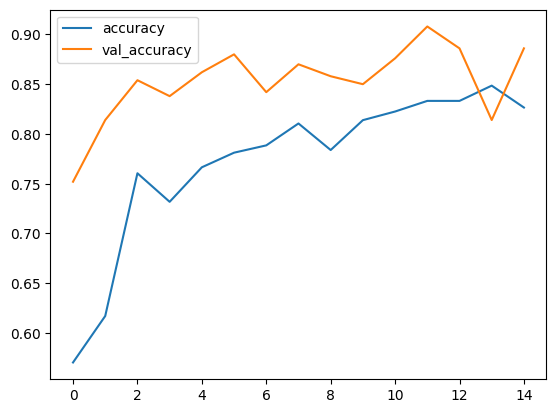

In [113]:
tf.random.set_seed(40)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(200,3,1,input_shape=(224,224,3),activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(100,3,1,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(50,3,1,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(20,3,1,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer= tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1 = model_1.fit(train_data_augumented,validation_data=test_data,epochs=15)
pd.DataFrame(history_1.history)[['accuracy','val_accuracy']].plot()

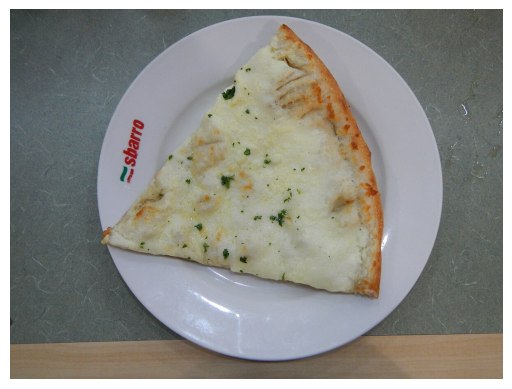

Model predict => pizza


In [114]:
def predict_img(url):
  img = Image.open(url)
  plt.imshow(img)
  plt.axis('off')
  plt.show()
  img = img.resize((224,224))
  img = img.convert('RGB')  # Ensure the image is in RGB mode
  img = np.array(img)/255
  img = np.expand_dims(img, axis=0)

  prediction = round(model_1.predict(img,verbose=0)[0][0])
  print(f'Model predict => {food_labels[prediction]}')



# Try predict pizza like imgs
predict_img('pizza.jpg')

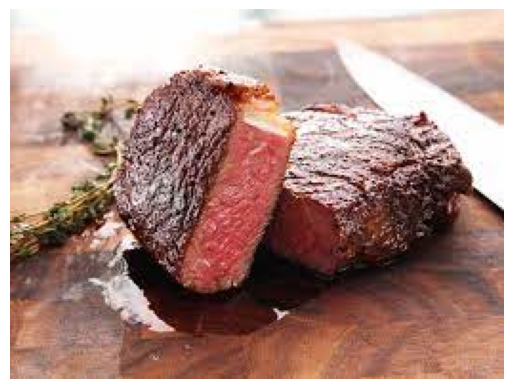

Model predict => steak


In [115]:
# Try predict steak like imgs
predict_img('steak.jpg')

#### Image classification using Only Dense layers might produce a prediction output, but with large number of trainable params and less accuracy

In [ ]:

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(400,activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.Dense(200,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])


model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])


model_2.fit(train_data,validation_data=test_data, epochs=5)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


47/47 [==============================] - 44s 884ms/step - loss: 1.5328 - accuracy: 0.7191 - val_loss: 0.4363 - val_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 40s 851ms/step - loss: 0.4625 - accuracy: 0.7925 - val_loss: 0.3973 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 40s 861ms/step - loss: 0.4002 - accuracy: 0.8259 - val_loss: 0.3471 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 40s 857ms/step - loss: 0.3628 - accuracy: 0.8466 - val_loss: 0.6156 - val_accuracy: 0.7460
Epoch 5/5
47/47 [==============================] - 40s 857ms/step - loss: 0.3422 - accuracy: 0.8659 - val_loss: 0.3705 - val_accuracy: 0.8360


In [ ]:
# a non CNC is terrible on img data as it need a very high of trainable param.
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 224, 224, 400)     1600      
                                                                 
 dense_31 (Dense)            (None, 224, 224, 200)     80200     
                                                                 
 dense_32 (Dense)            (None, 224, 224, 100)     20100     
                                                                 
 flatten_2 (Flatten)         (None, 5017600)           0         
                                                                 
 dense_33 (Dense)            (None, 1)                 5017601   
                                                                 
Total params: 5119501 (19.53 MB)
Trainable params: 5119501 (19.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# MultiClass Classifications..

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import zipfile


# Import Data

if not os.path.exists('10_food_classes_all_data.zip'):
  !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
  zipref = zipfile.ZipFile('10_food_classes_all_data.zip')
  zipref.extractall()
  zipref.close()
else:
  print('file alrady exists')


--2023-12-22 17:11:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.0.91, 172.217.12.27, 2607:f8b0:4025:810::201b, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.0.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  76.3MB/s    in 7.1s    

2023-12-22 17:12:01 (69.8 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
labels_list = os.listdir('10_food_classes_all_data/train')
labels_list.sort()
labels_list

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [4]:
# Explore num of img inside each train-test split, by help of ChatGPT

def count_directories_and_files(base_dir):
    directories = os.listdir(base_dir)
    for directory in directories:
        directory_path = os.path.join(base_dir, directory)
        if os.path.isdir(directory_path):
            count_directories_and_files(directory_path)
            subdirectories = [d for d in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, d))]
            files = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]
            print(f"Directory: {directory_path}, Subdirectories: {len(subdirectories)}, Files: {len(files)}")

base_directory = '10_food_classes_all_data'
count_directories_and_files(base_directory)

Directory: 10_food_classes_all_data/test/sushi, Subdirectories: 0, Files: 250
Directory: 10_food_classes_all_data/test/fried_rice, Subdirectories: 0, Files: 250
Directory: 10_food_classes_all_data/test/pizza, Subdirectories: 0, Files: 250
Directory: 10_food_classes_all_data/test/ice_cream, Subdirectories: 0, Files: 250
Directory: 10_food_classes_all_data/test/chicken_wings, Subdirectories: 0, Files: 250
Directory: 10_food_classes_all_data/test/grilled_salmon, Subdirectories: 0, Files: 250
Directory: 10_food_classes_all_data/test/chicken_curry, Subdirectories: 0, Files: 250
Directory: 10_food_classes_all_data/test/ramen, Subdirectories: 0, Files: 250
Directory: 10_food_classes_all_data/test/steak, Subdirectories: 0, Files: 250
Directory: 10_food_classes_all_data/test/hamburger, Subdirectories: 0, Files: 250
Directory: 10_food_classes_all_data/test, Subdirectories: 10, Files: 0
Directory: 10_food_classes_all_data/train/sushi, Subdirectories: 0, Files: 750
Directory: 10_food_classes_all_d

In [59]:
train_datagen_augumented = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                rotation_range=0.2,
                                                                shear_range=0.2,
                                                                zoom_range=0.2,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                horizontal_flip = True)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.)


train_data_augumented = train_datagen_augumented.flow_from_directory(directory = '10_food_classes_all_data/train',
                                             target_size = (224,224),
                                             class_mode='categorical',
                                             batch_size=32)

test_data = test_datagen.flow_from_directory(directory = '10_food_classes_all_data/test',
                                             target_size = (224,224),
                                             class_mode='categorical',
                                             batch_size=32)


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


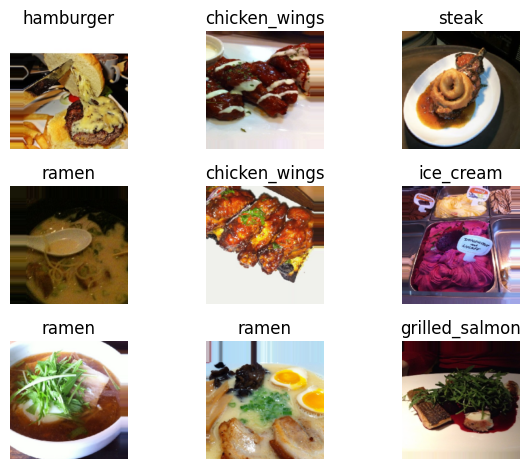

In [6]:
# Visualize 9 random samples of our data
samples = 9
for i in range(1,samples+1):
  plt.subplot(samples//3,3,i)
  batch = np.random.randint(0,234)
  img = np.random.randint(0,32)
  plt.imshow(train_data_augumented[batch][0][img])
  plt.title(labels_list[tf.argmax(train_data_augumented[batch][1][img]).numpy()])
  plt.axis('off')
plt.tight_layout()
plt.show()

In [14]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,3,input_shape=(224,224,3),activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(16,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(16,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(16,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(16,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(16,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(40,activation='relu'),
    # tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model_2.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer='Adam',
                metrics=['accuracy'])
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 111, 111, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 109, 109, 16)      2320      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 54, 54, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 52, 52, 16)        2320      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 26, 26, 16)      

In [19]:
model_2.fit(train_data_augumented,epochs=5,validation_data=test_data)

Epoch 1/5
235/235 [==============================] - 471s 2s/step - loss: 2.2632 - accuracy: 0.1392 - val_loss: 2.2316 - val_accuracy: 0.1788
Epoch 2/5
235/235 [==============================] - 469s 2s/step - loss: 2.2066 - accuracy: 0.1672 - val_loss: 2.1541 - val_accuracy: 0.1972
Epoch 3/5
235/235 [==============================] - 467s 2s/step - loss: 2.1551 - accuracy: 0.2024 - val_loss: 2.1128 - val_accuracy: 0.2540
Epoch 4/5
235/235 [==============================] - 473s 2s/step - loss: 2.0968 - accuracy: 0.2456 - val_loss: 2.0296 - val_accuracy: 0.2692
Epoch 5/5
235/235 [==============================] - 466s 2s/step - loss: 2.0508 - accuracy: 0.2632 - val_loss: 1.9274 - val_accuracy: 0.3300


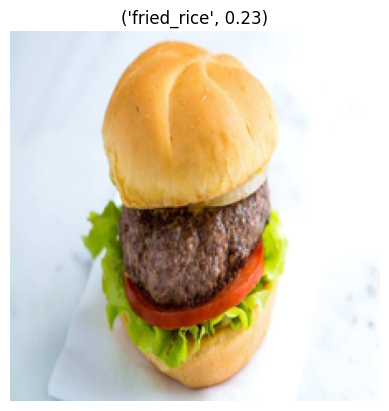

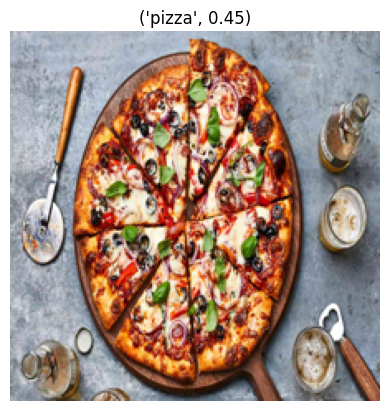

In [61]:
def predict_img(url):
  img = Image.open(url)
  img = img.resize((224,224))
  img = np.array(img)
  img = img/255.
  img_ = tf.expand_dims(img,axis=0)
  prediction = model_2.predict(img_, verbose=0)
  max_pred = tf.argmax(prediction,axis=1).numpy()[0]
  max_pred
  probability = int(prediction[0][max_pred]*100//1)/100
  probability
  y_pred = labels_list[max_pred]
  y_pred
  plt.imshow(img)
  plt.axis('off')
  plt.title(f'{y_pred,probability}')
  plt.show()

# Testing result after 5 epochs 33% Acc
predict_img('burger.jpg')
predict_img('pizza.jpg')

In [62]:
model_2.fit(train_data_augumented,epochs=10,validation_data=test_data)

Epoch 1/10
235/235 [==============================] - 477s 2s/step - loss: 2.0192 - accuracy: 0.2711 - val_loss: 1.8982 - val_accuracy: 0.3328
Epoch 2/10
235/235 [==============================] - 466s 2s/step - loss: 1.9861 - accuracy: 0.2881 - val_loss: 1.9284 - val_accuracy: 0.3236
Epoch 3/10
235/235 [==============================] - 467s 2s/step - loss: 1.9656 - accuracy: 0.3016 - val_loss: 1.8913 - val_accuracy: 0.3368
Epoch 4/10
235/235 [==============================] - 470s 2s/step - loss: 1.9496 - accuracy: 0.3061 - val_loss: 1.8172 - val_accuracy: 0.3728
Epoch 5/10
235/235 [==============================] - 461s 2s/step - loss: 1.9308 - accuracy: 0.3165 - val_loss: 1.8230 - val_accuracy: 0.3728
Epoch 6/10
235/235 [==============================] - 461s 2s/step - loss: 1.9002 - accuracy: 0.3351 - val_loss: 1.8181 - val_accuracy: 0.3644
Epoch 7/10
235/235 [==============================] - 466s 2s/step - loss: 1.8946 - accuracy: 0.3289 - val_loss: 1.7716 - val_accuracy: 0.3844

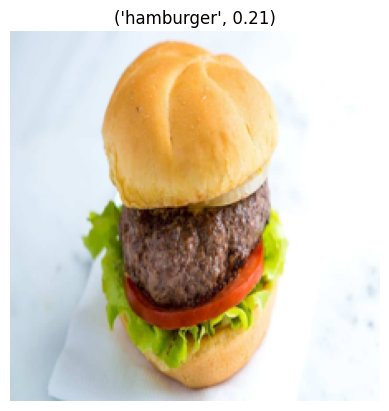

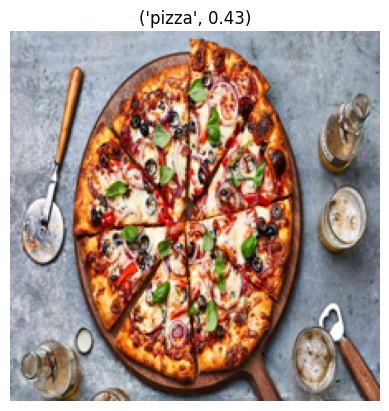

In [64]:
# Running the same test after additional 10 epochs 42% Acc
predict_img('burger.jpg')
predict_img('pizza.jpg')


In [65]:
model_2.save('food101_image_classification.keras')

In [117]:
model_2 = tf.keras.models.load_model('food101_image_classification.keras')
predictions = model_2.predict(test_data)
predict_vector = tf.argmax(predictions,axis=1)

79/79 [==============================] - 30s 379ms/step


In [79]:
test_data = test_datagen.flow_from_directory(directory = '10_food_classes_all_data/test',
                                             target_size = (224,224),
                                             class_mode='categorical',
                                             batch_size=32)

next_label = test_data.next()

y_true = next_label[1]
x_true = next_label[0]
for i in range(len(test_data)-1):
  next_label = test_data.next()
  y_true = np.concatenate((y_true,next_label[1]))
  x_true = np.concatenate((x_true,next_label[0]))

Found 2500 images belonging to 10 classes.


Model predict => sushi
Correct  is   => sushi


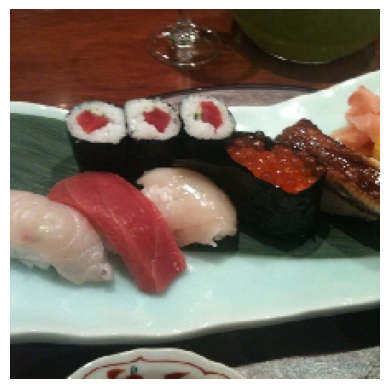

In [144]:
ind = np.random.randint(0,2500)
correct = labels_list[tf.argmax(y_true[ind]).numpy()]
prediction = labels_list[predict_vector[ind]]

print(f'Model predict => {prediction}')
print(f'Correct  is   => {correct}')

plt.imshow(x_true[ind])
plt.axis('off')
plt.show()

In [149]:
correct_vector = tf.argmax(y_true,axis=1)

(<tf.Tensor: shape=(2500,), dtype=int64, numpy=array([4, 3, 6, ..., 8, 2, 7])>,
 <tf.Tensor: shape=(2500,), dtype=int64, numpy=array([8, 4, 6, ..., 3, 2, 4])>)

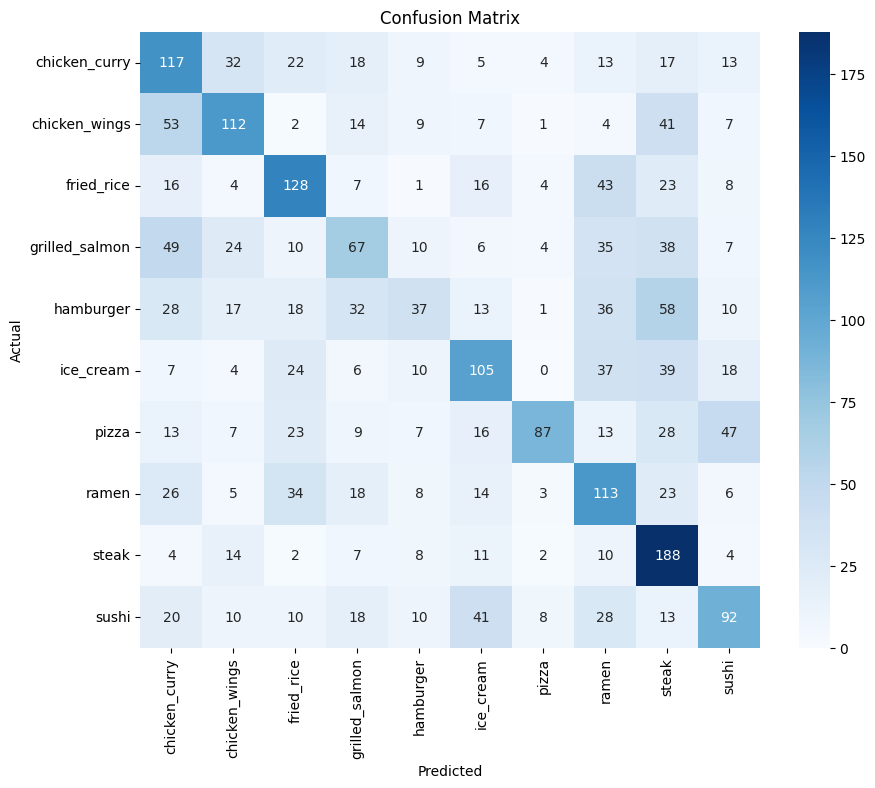

In [152]:
# Visualise confusion matrix by help of Chat GPT

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay


conf_matrix = tf.math.confusion_matrix(correct_vector, predict_vector, num_classes=len(labels_list))
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=labels_list, yticklabels=labels_list, cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
